In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('/kaggle/input/titanic/Titanic.csv')


# Анализ признаков

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Целевая переменная распределена достаточно сбалансированно

In [13]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: >

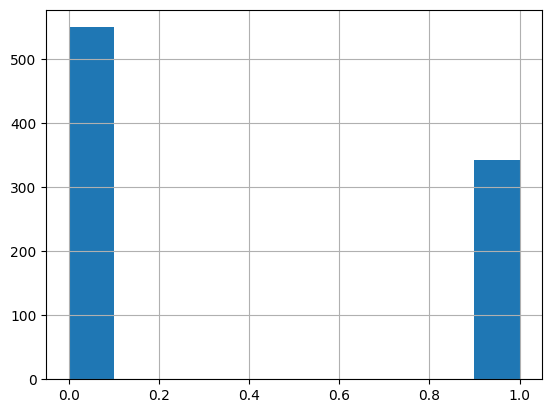

In [14]:
data['Survived'].hist()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Присутствуют пропущенные значения

In [16]:
data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Id
Id принимает уникальные значения. Колнка не несет полезной информации для предсказаний и будет удалена

In [17]:
data["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [18]:
data["PassengerId"].nunique()

891

# Pclass

В этой переменной хранится класс билета. По графикам видно, что это очень важная переменная, имеющая выраженные зависимости как с целевой перменной, так и с другими фичами

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

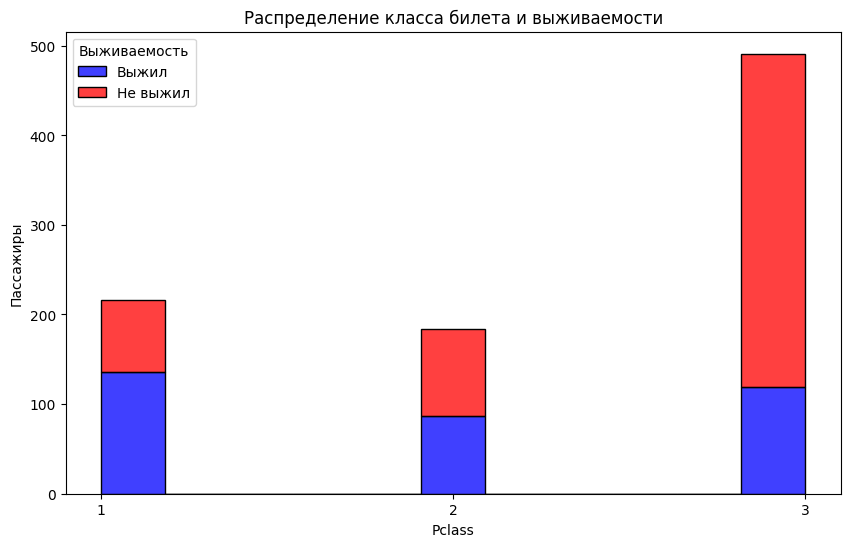

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Pclass", hue="Survived", multiple="stack",  palette={0: "red", 1: "blue"}, kde=False)
plt.title(f"Распределение класса билета и выживаемости")
plt.xlabel("Pclass")
plt.xticks(ticks=[1, 2, 3], labels=['1', '2', '3'])
plt.ylabel("Пассажиры")
plt.legend(title='Выживаемость', labels=['Выжил', 'Не выжил'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

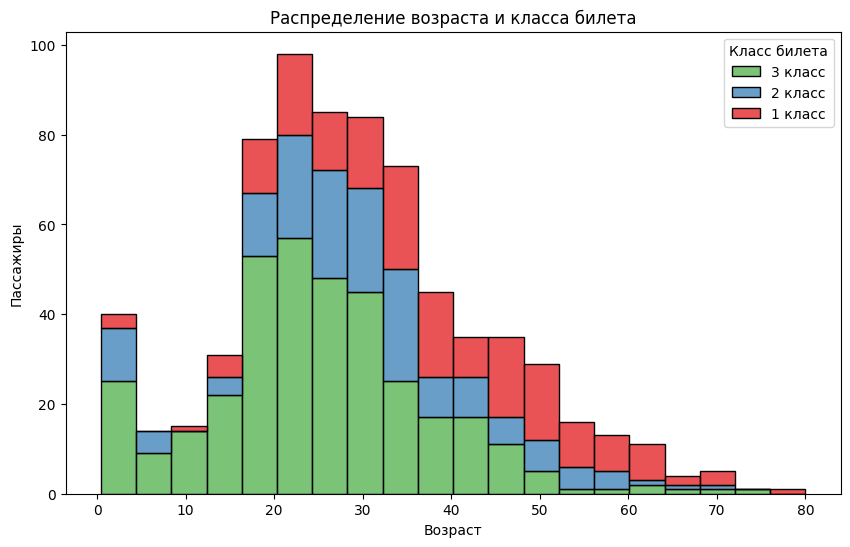

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Age", hue="Pclass", multiple="stack",  palette="Set1", kde=False)
plt.title(f"Распределение возраста и класса билета")
plt.xlabel("Возраст")
plt.ylabel("Пассажиры")
plt.legend(title='Класс билета', labels=['3 класс', '2 класс', "1 класс"])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

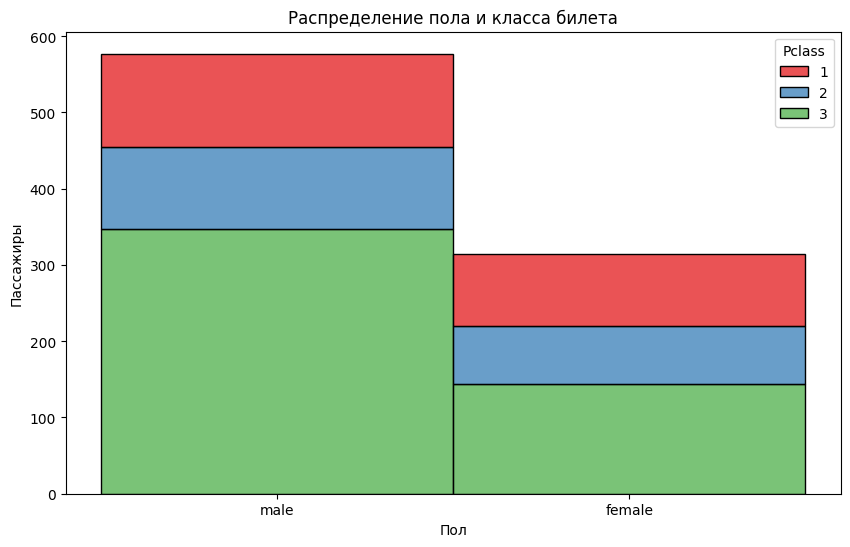

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Sex", hue="Pclass", multiple="stack",  palette="Set1", kde=False)
plt.title(f"Распределение пола и класса билета")
plt.xlabel("Пол")
plt.ylabel("Пассажиры")
plt.show()

# Name

Имена уникальны и не несут полезной информации.

In [22]:
data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

## Age

### Из-за того, что данных в датасете достаточно мало (по меркам нейронных сетей) имеет смысл преобразовать столбец возраста из вещественных чисел в набор интервалов

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

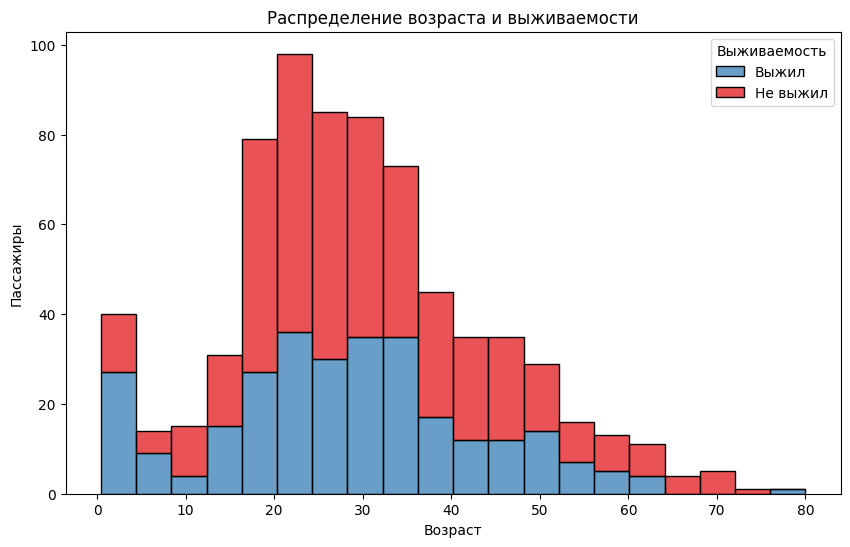

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack",  palette="Set1", kde=False)
plt.title(f"Распределение возраста и выживаемости")
plt.xlabel("Возраст")
plt.ylabel("Пассажиры")
plt.legend(title='Выживаемость', labels=['Выжил', 'Не выжил'])
plt.show()

### Необходимо заполнить пропуски в данных

Заполним пропуски в данных медианным значением

In [24]:
data["Age"].isna().sum()

177

In [25]:
data['Age'].fillna(data['Age'].median(), inplace=True)

/tmp/ipykernel_30/913469570.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


### Преобразование возраста в набор интервалов

In [26]:
bins = [-1, 0, 15, 35, 50, 65, 500]
labels = ['None', '0-15', '15-35', '35-50', '50-65', "65-..."]
data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [27]:
data['Age']

0      15-35
1      35-50
2      15-35
3      35-50
4      35-50
       ...  
886    15-35
887    15-35
888    15-35
889    15-35
890    15-35
Name: Age, Length: 891, dtype: category
Categories (6, object): ['None' < '0-15' < '15-35' < '35-50' < '50-65' < '65-...']

# SibSp

Переменная отвечает за количество близких родственников, кроме детей родителей

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

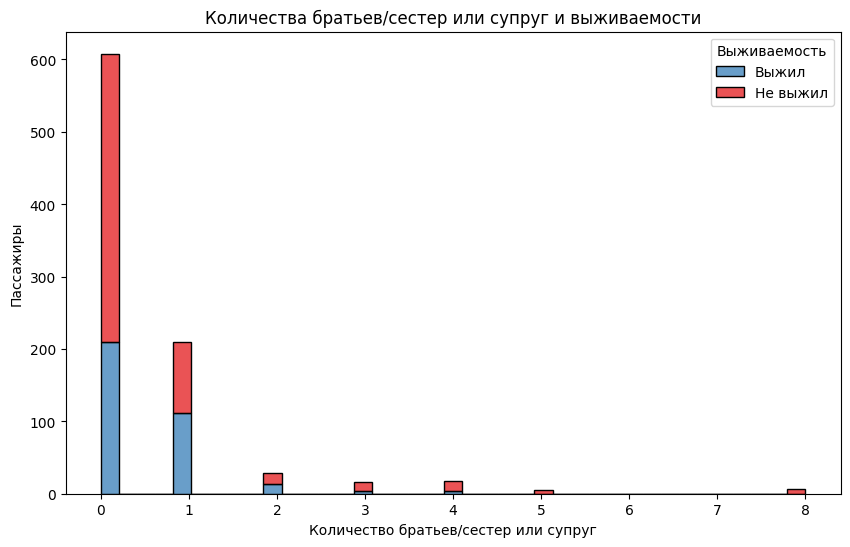

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="SibSp", hue="Survived", multiple="stack",  palette="Set1", kde=False)
plt.title(f"Количества братьев/сестер или супруг и выживаемости")
plt.xlabel("Количество братьев/сестер или супруг")
plt.ylabel("Пассажиры")
plt.legend(title='Выживаемость', labels=['Выжил', 'Не выжил'])
plt.show()

# Parch

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

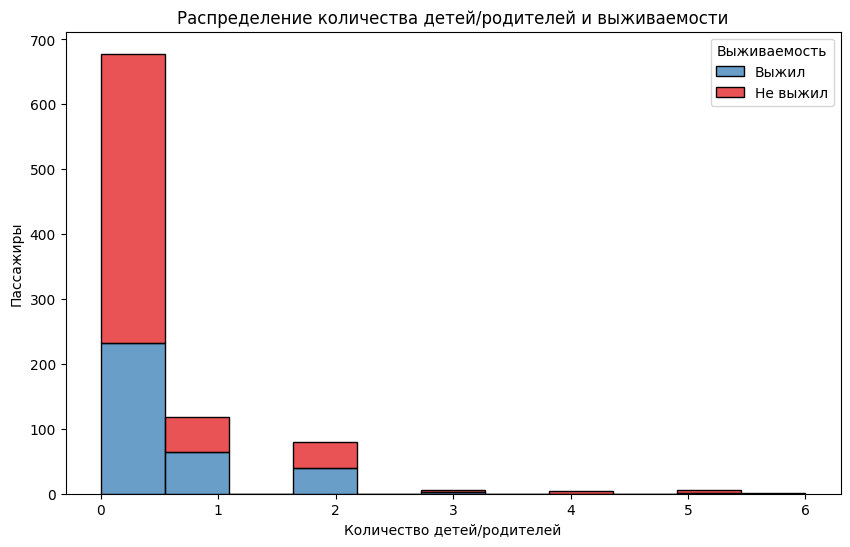

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Parch", hue="Survived", multiple="stack",  palette="Set1", kde=False)
plt.title(f"Распределение количества детей/родителей и выживаемости")
plt.xlabel("Количество детей/родителей")
plt.ylabel("Пассажиры")
plt.legend(title='Выживаемость', labels=['Выжил', 'Не выжил'])
plt.show()

# Ticket

Номера билетов уникальны и не несут полезной информации.

In [30]:
data["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

# Fare

Как видно на гистограмме, цена билета является важной фичей для предсказания целевой перемнной

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

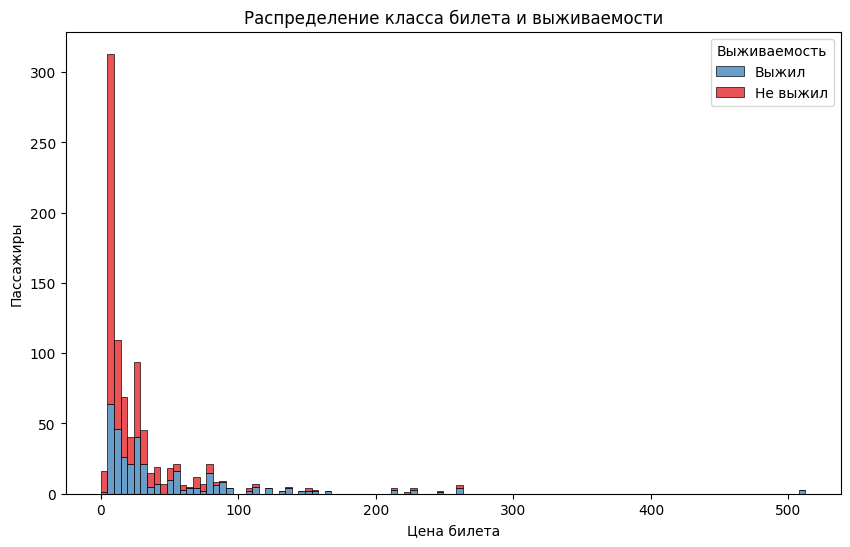

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Fare", hue="Survived", multiple="stack",  palette="Set1", kde=False)
plt.title(f"Распределение класса билета и выживаемости")
plt.xlabel("Цена билета")
plt.ylabel("Пассажиры")
plt.legend(title='Выживаемость', labels=['Выжил', 'Не выжил'])
plt.show()

# Cabin

Номера кабин уникальны. При этом около 80% данных в этом столбце пропущены. Столбец следует удалить

In [32]:
data["Cabin"].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [33]:
data["Cabin"].isna().sum()

687

# Embarked

Как видно из гистограммы, порт посадки также является важной переменной для предсказания

In [34]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

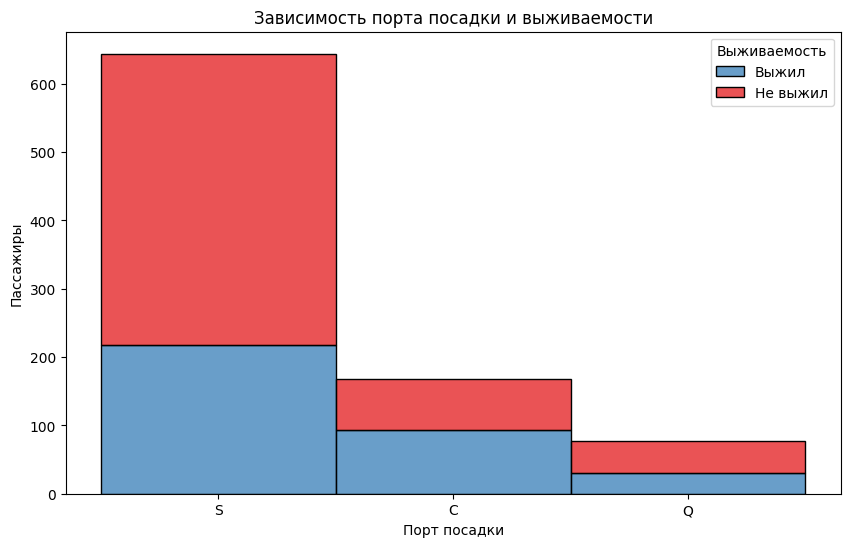

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Embarked", hue="Survived", multiple="stack",  palette="Set1", kde=False)
plt.title(f"Зависимость порта посадки и выживаемости")
plt.xlabel("Порт посадки")
plt.ylabel("Пассажиры")
plt.legend(title='Выживаемость', labels=['Выжил', 'Не выжил'])
plt.show()

# Удаление ненужных столбцов

In [36]:
data = data.drop(["Name", "Cabin", "PassengerId", "Ticket"], axis=1)


# Преобразование категориальных фич в числа

In [37]:
categorical_cols = data.select_dtypes(include=['object', "category"]).columns
label_encoders = {}

from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Данные преобразованы в числа, все пропуски в данных убраны

In [38]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,2
1,1,1,0,2,1,0,71.2833,0
2,1,3,0,1,0,0,7.9250,2
3,1,1,0,2,1,0,53.1000,2
4,0,3,1,2,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,13.0000,2
887,1,1,0,1,0,0,30.0000,2
888,0,3,0,1,1,2,23.4500,2
889,1,1,1,1,0,0,30.0000,0


In [39]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [40]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Когда все данные числа можно удобно посмотреть на корреляции различных признаков на  тепловой карте

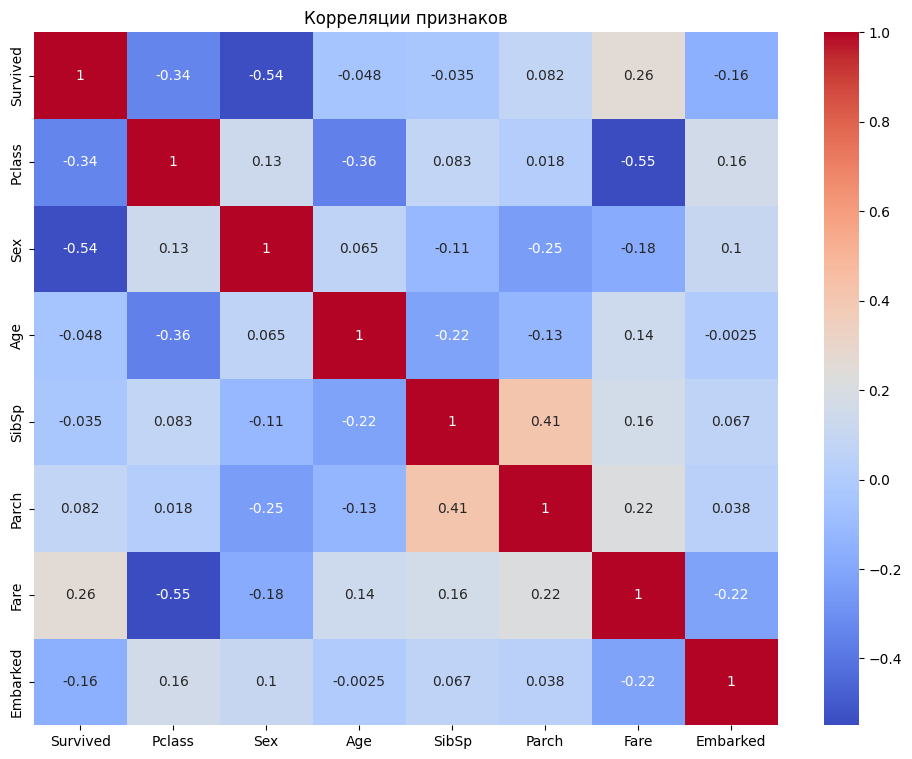

In [41]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

plt.title('Корреляции признаков')

plt.show()

# Обучение модели

In [42]:
X = data.drop(columns=['Survived'])
y = data['Survived']

## Функция инициализации полносвязной нейронной сети
### В качестве оптимизатора используется стандартный adam. Из-за того, что целевая переменная распределена сбалансированно, можно эффективно использовать обычную бинарную кросс энтропию

In [43]:
from sklearn.model_selection import train_test_split, KFold
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

def initilize_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dropout(0.1))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
    return model

## Обучение первой модели

Здесь данные масштабируются. Выборка делится на тренировочную и тестовую. Во время обучения Keras дополнительно создает ещё валидационную выборку.

Модель не используется для вывода результатов, но на ней можно проверить, как нейронная сеть обучается, посмотреть на график обучения с валидационной выборкой.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = initilize_nn()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4111 - loss: 0.7329 - val_accuracy: 0.6993 - val_loss: 0.6644
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6741 - loss: 0.6630 - val_accuracy: 0.7972 - val_loss: 0.6173
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7455 - loss: 0.6196 - val_accuracy: 0.8392 - val_loss: 0.5479
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7707 - loss: 0.5580 - val_accuracy: 0.8462 - val_loss: 0.4688
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 0.5046 - val_accuracy: 0.8462 - val_loss: 0.4185
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8064 - loss: 0.4564 - val_accuracy: 0.8531 - val_loss: 0.3953
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8015 - loss: 0.4518 - val_accuracy: 0.8462 - val_loss: 0.3910
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8199 - loss: 0.4342 - val_accuracy: 0.8531 - val_loss

## На графике видно, что лосс модели стабильно падает и модель достаточно хорошо сходится

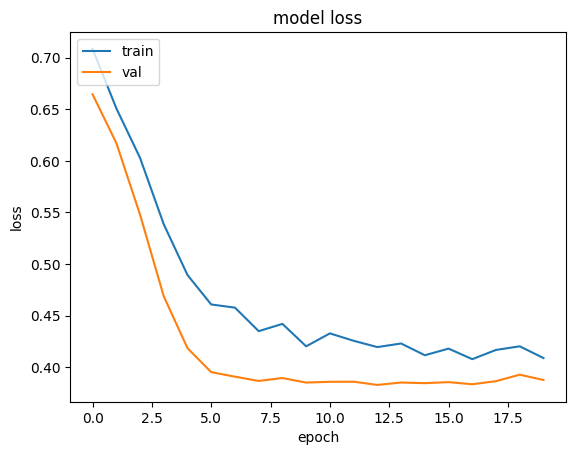

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Обучение модели и вывод результатов

Здесь данные делятся на 3 части. Каждая часть данных используется в тестовой выборке, пока остальные 2 части используются для тренеровки.
Для каждого из 3 обучений модели отображаются все основные метрики, а также строится матрица ошибок

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       177
           1       0.80      0.72      0.76       120

    accuracy                           0.81       297
   macro avg       0.81      0.80      0.80       297
weighted avg       0.81      0.81      0.81       297



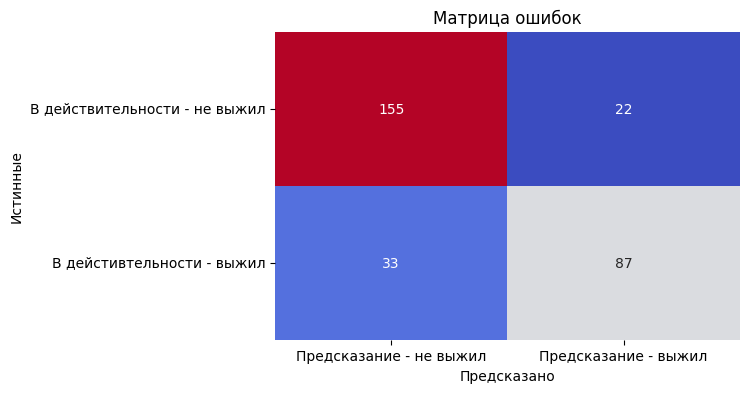

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       185
           1       0.84      0.69      0.75       112

    accuracy                           0.83       297
   macro avg       0.83      0.80      0.81       297
weighted avg       0.83      0.83      0.83       297



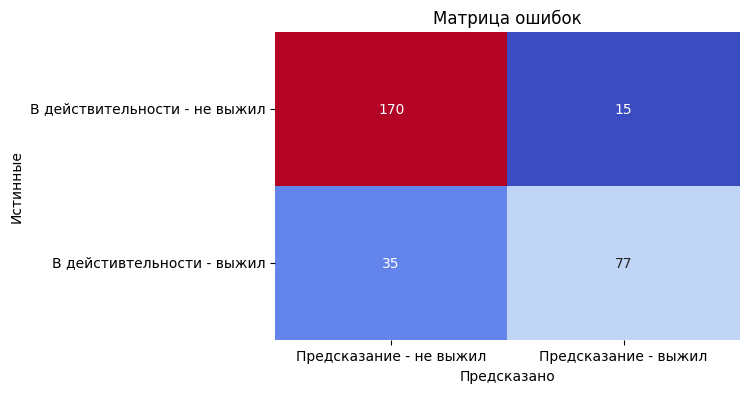

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       187
           1       0.73      0.69      0.71       110

    accuracy                           0.79       297
   macro avg       0.78      0.77      0.77       297
weighted avg       0.79      0.79      0.79       297



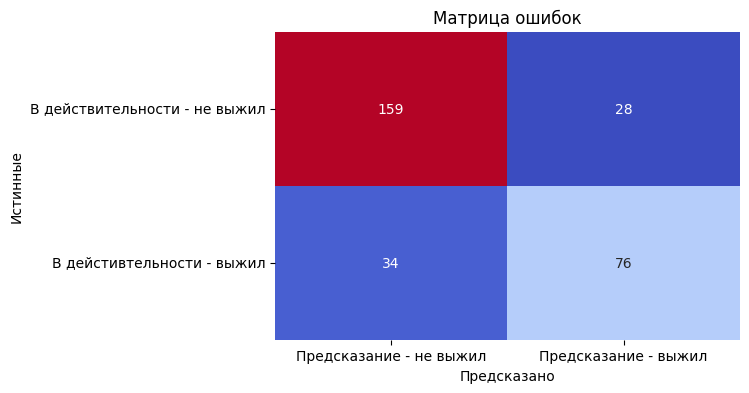

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kfolds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = initilize_nn()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                        verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred < 0.5, 0, 1).flatten()

    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
                xticklabels=['Предсказание - не выжил', 'Предсказание - выжил'],
                yticklabels=['В действительности - не выжил', 'В дейстивтельности - выжил'])
    plt.title(f"Матрица ошибок")
    plt.xlabel("Предсказано")
    plt.ylabel("Истинные")
    plt.show()


## Выводы по результам модели.

### Анализ матрицы ошибок
При обучении и тестировании модели на первом фолде модель предсказала, что 196 человек не выжило. Из них 158 действительно не выжили и 38 на само деле выжили (то есть модель ошиблась).
Также на первом фолде модель предсказала, что 101 человек выжил. Из них 82 человека в дейстительности выжили и в 19 случаях модель ошиблась.

### Анализ метрик
По метрикам видно, что модель имеет около 80% верных предсказаний. Однако, целевая перменная не иделаьно сбалансирована. Поэтому особенно важно смотреть на другие метрики такие как точность и полнота.
Видно, что модель дает более точные предсказания, для людей, которые погибли. Эта скорее всего связано с тем, что отрицательных примеров в датасете значительно больше, чем положительных.
Precision и recall для отрицательных примеров стабильно выше, чем для положительных. F1-score для положительных примеров ниже. Модель склонна двавать отрицательные прогнозы. 

Однако, метрики для положительных примеров все еще достаточно высоки. То есть, модель не просто запомнила, что в данных больше отрицательных примеров, а действительно выделила закономерности в данных

# Общие выводы

### Модель стабильно показывает сравнительно высокие метрики. На каждом из 3-х фолдов у модели около 80% верных предсказаний. Recall и Precision также остаются досаточно высокими на всех 3 фолдах. При этом, тенденции к ошибкам модели (соотношение precision и recall для отрицательных и положительных классов) также сохранаяется.

### Нужно отметить, что accyracy 0.8, для датасета Титаника это не очень высокий результат. Это связано с самой моделью. Нейронные сети лучше подходят для однородных данных, таких как изображения или текст. Для табличных данныхх лучше подходят модели классического машинного обучения.